* Data: https://www.kaggle.com/datasets/prasad22/healthcare-dataset?select=healthcare_dataset.csv

* This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

* Usage Scenarios: This dataset can be utilized for a wide range of purposes, including: Developing and testing healthcare predictive models.
Practicing data cleaning, transformation, and analysis techniques.
Creating data visualizations to gain insights into healthcare trends.
Learning and teaching data science and machine learning concepts in a healthcare context.
You can treat it as a Multi-Class Classification Problem and solve it for Test Results which contains 3 categories(Normal, Abnormal, and Inconclusive).

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv('healthcare_dataset.csv', index_col=0, parse_dates=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2956\4275927586.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('healthcare_dataset.csv', index_col=0, parse_dates=True)


In [5]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Name,,,,,,,,,,,,,,
Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [38]:
data.shape

(55500, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, Bobby JacksOn to jAMES GARCiA
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Room Number         55500 non-null  int64  
 10  Admission Type      55500 non-null  object 
 11  Discharge Date      55500 non-null  object 
 12  Medication          55500 non-null  object 
 13  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+ MB


In [71]:
# Convert the "Date" column to datetime format
# so we can calculate the time difference between the "Date of Admission" and "Discharge Date"

data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data['Length of Stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
data.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

In [39]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Length of Stay
Name,,,,,,,,,,,,,
Bobby JacksOn,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2
LesLie TErRy,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6
DaNnY sMitH,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15
andrEw waTtS,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30
adrIENNE bEll,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20


In [8]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [9]:
data.isnull().sum()

Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

>> No missing values. It's probably because of syntetic data.

In [13]:
# Let's firts check the frequency of medical conditions
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [40]:
data['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [ ]:
# Let's check the correlation between "Billing Amount" and "Admission Type" by splitting data into groups
# and calculating the mean billing amount for each group

In [ ]:
data.groupby('Admission Type').agg({'Billing Amount': ['mean', 'sum', 'count'], 'Age': 'mean'})


In [19]:
# Let's see which patients have the highest billing amounts
# We will sort the data by 'Billing Amount' and take the top 10 entries
data.sort_values(by='Billing Amount', ascending=False).head(10)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
Name,,,,,,,,,,,,,,
tOdd CARrILlO,51,Female,A+,Hypertension,2023-09-08,Kathleen Griffin,Griffin Group,Blue Cross,52764.276736,209,Elective,2023-10-04,Ibuprofen,Normal
kARen klInE,74,Female,AB+,Cancer,2021-06-19,Dr. Joseph Gordon,Hernandez-Morton,UnitedHealthcare,52373.032374,181,Urgent,2021-07-03,Penicillin,Inconclusive
kARen klInE,79,Female,AB+,Cancer,2021-06-19,Dr. Joseph Gordon,Hernandez-Morton,UnitedHealthcare,52373.032374,181,Urgent,2021-07-03,Penicillin,Inconclusive
DAVId SanDOvaL,22,Male,AB-,Hypertension,2019-11-02,Taylor Novak,Sons and Bailey,Blue Cross,52271.663747,228,Emergency,2019-11-11,Ibuprofen,Normal
kathRYN GoNzales,18,Female,O+,Diabetes,2020-08-11,Kristin Clark,Miller Ltd,Aetna,52211.852966,383,Urgent,2020-08-12,Paracetamol,Inconclusive
BRETT mARshAll,42,Female,B+,Asthma,2021-11-10,Robert Hartman,PLC Garner,Aetna,52181.837792,140,Emergency,2021-11-17,Penicillin,Inconclusive
LAuRie hOod,43,Female,A-,Arthritis,2021-06-27,Brian Riley,Walker-Garcia,Cigna,52170.036854,306,Urgent,2021-06-29,Penicillin,Normal
LAuRie hOod,42,Female,A-,Arthritis,2021-06-27,Brian Riley,Walker-Garcia,Cigna,52170.036854,306,Urgent,2021-06-29,Penicillin,Normal
JUstIn CLark,53,Female,AB+,Cancer,2019-05-30,Andrea Jones,Ruiz-Anthony,UnitedHealthcare,52154.237722,399,Urgent,2019-06-22,Aspirin,Normal


In [20]:
# Let's see the patient age range
data.groupby('Gender')['Age'].agg(['mean', 'min', 'max'])

,mean,min,max
Gender,,,
Female,51.578735,13,89
Male,51.500252,13,89


In [62]:
# Let's check numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
numerical_columns


Index(['Age', 'Billing Amount', 'Room Number', 'Length of Stay'], dtype='object')

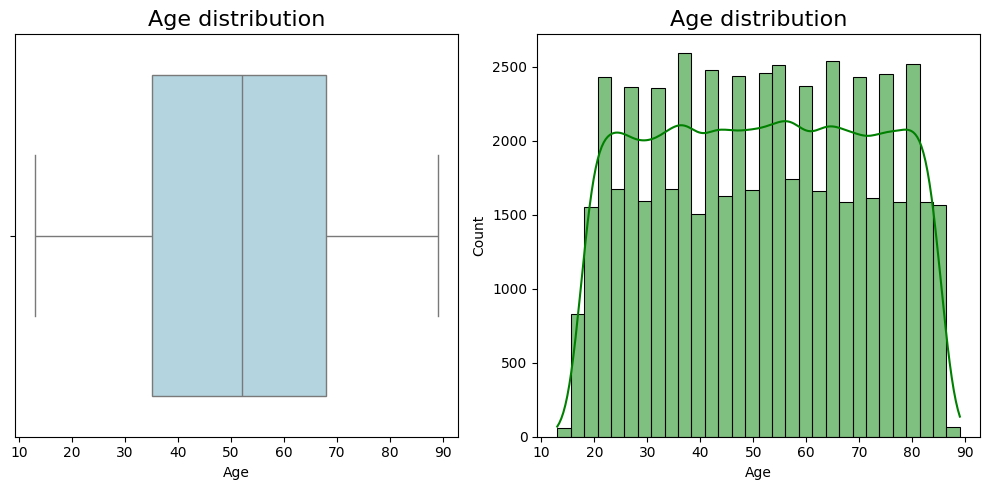

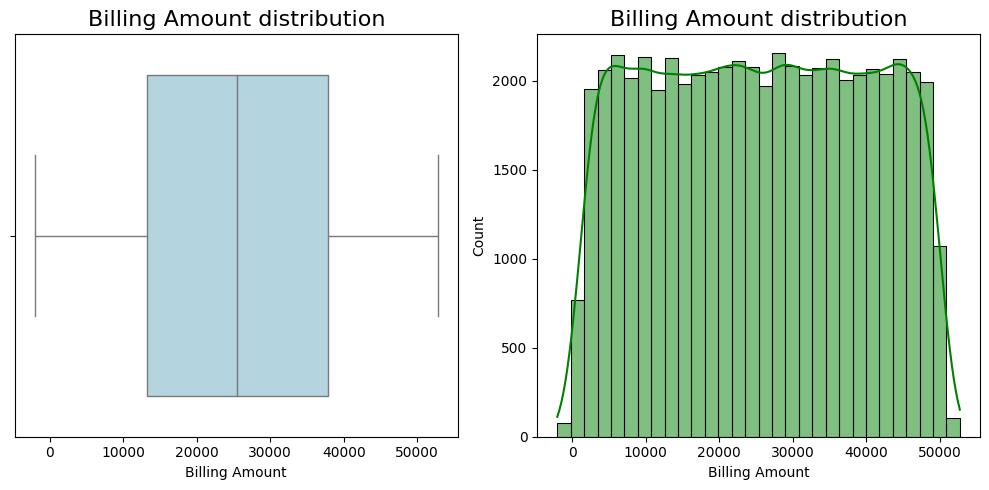

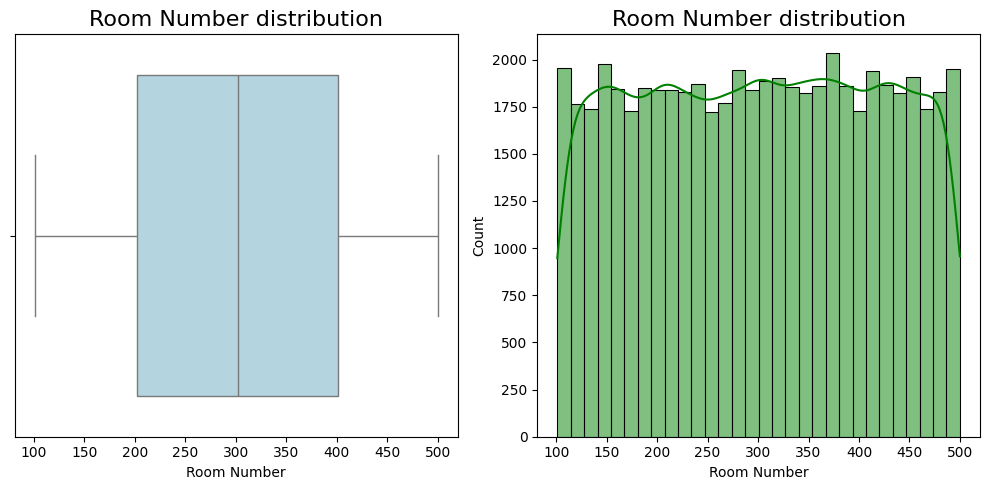

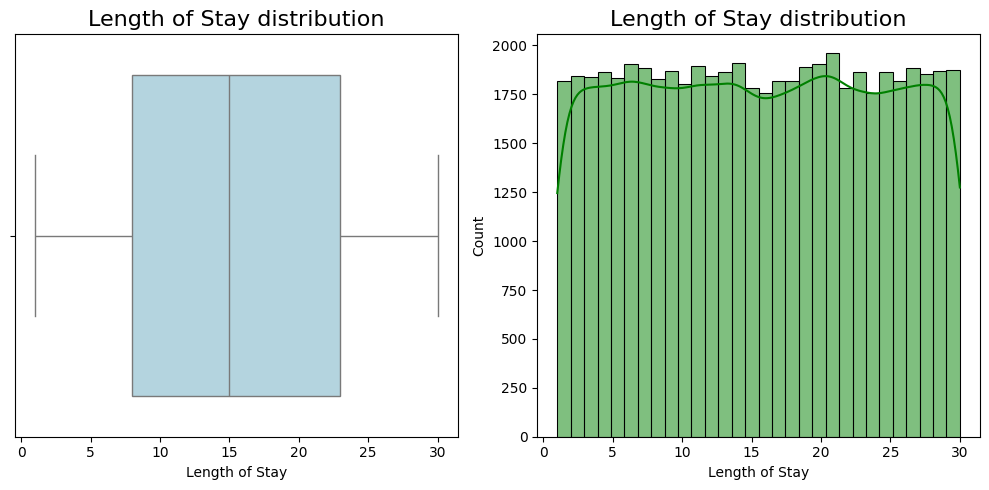

In [66]:
numerical_columns = ['Age', 'Billing Amount', 'Room Number', 'Length of Stay']
for i in numerical_columns:
 fig, ax = plt.subplots(1,2, figsize=(10, 5))
 sns.boxplot(data=data, x=i, ax=ax[0], color='lightblue')
 ax[0].set_title(f'{i} distribution', fontsize=16)
 sns.histplot(data=data, x=i, bins=30, kde=True, ax=ax[1], color='green')
 ax[1].set_title(f'{i} distribution', fontsize=16)
 plt.tight_layout()
plt.show()

In [23]:
# Let's pick the features to visualize using heatmap
features = ['Age', 'Billing Amount', 'Length of Stay', 'Number of Procedures', 'Number of Medications']

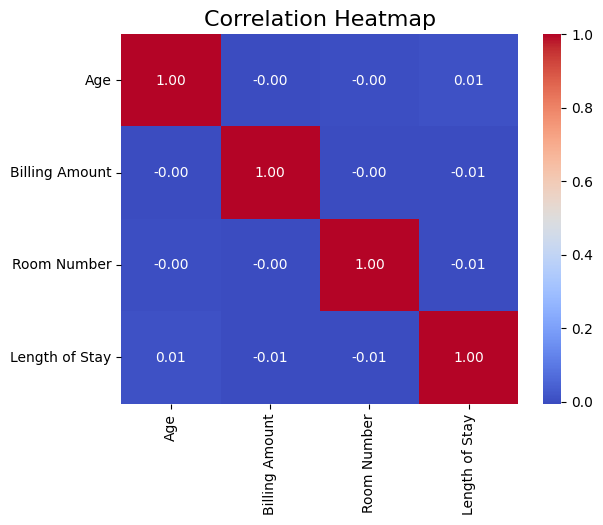

In [67]:
# Correlation between features
sns.heatmap(data=data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

>> There correlation matrix shows very weak or no linear relationship between the numerical features in the dataset.
* All correlation coeficcients are close to -0, indicating that features are statistically independent of each other.
* No strong multicollinearity is present - good for most machine learning models.
* If predictive modeling is plannes, each feature is likely to bring distinct information to the model, but none are strongly predictive alone.
* For the future - consider using non-linear models or feature engineering to capture more relationship

In [77]:
# Let's check which columns are in format object
object_columns = data.select_dtypes(include=['object']).columns
object_columns

Index(['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital',
       'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'],
      dtype='object')

In [78]:
unique_vals_analysis = pd.DataFrame(columns=['column', 'unique_values', 'num_of_unique_values']) # creating an empty dataframe to store the results
unique_rows = []
for col in object_columns:
    new_row={'column': col, 'unique_values': data[col].unique(), 'num_of_unique_values': data[col].nunique()} # that's how the rows will look like
    unique_rows.append(new_row) # appending the new row to the list

unique_vals_analysis = pd.DataFrame(unique_rows) # creating a dataframe from the list of rows
unique_vals_analysis = unique_vals_analysis.set_index('column') # setting the column as index
unique_vals_analysis


,unique_values,num_of_unique_values
column,,
Gender,"[Male, Female]",2
Blood Type,"[B-, A+, A-, O+, AB+, AB-, B+, O-]",8
Medical Condition,"[Cancer, Obesity, Diabetes, Asthma, Hypertensi...",6
Doctor,"[Matthew Smith, Samantha Davies, Tiffany Mitch...",40341
Hospital,"[Sons and Miller, Kim Inc, Cook PLC, Hernandez...",39876
Insurance Provider,"[Blue Cross, Medicare, Aetna, UnitedHealthcare...",5
Admission Type,"[Urgent, Emergency, Elective]",3
Medication,"[Paracetamol, Ibuprofen, Aspirin, Penicillin, ...",5
Test Results,"[Normal, Inconclusive, Abnormal]",3


In [ ]:
# Categorical columns analysis
# Does the admission type affect the billing amount?
sns.boxplot(x='Admission Type', y='Billing Amount', data=data, palette='Set2')
plt.title('Billing Amount by Admission Type', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [84]:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition','Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

In [ ]:
# Let's see how Billing Amount is affected by Gender
billing_gender = data.groupby('Gender')['Billing Amount'].sum().reset_index()
billing_gender['Billing Amount'] = billing_gender['Billing Amount'].apply(lambda x: '{:,.2f}'.format(x)) # formatting the billing amount to 2 decimal places
print(billing_gender[['Gender', 'Billing Amount']])



   Gender  Billing Amount
0  Female  706,199,323.90
1    Male  711,232,719.49


In [86]:
# Let's display top 10 most costly medical conditions
condition_billing = data.groupby('Medical Condition')['Billing Amount'].sum().sort_values(ascending=False)
print("Top 10 most costly medical conditions:")
print(condition_billing.head(10))

Top 10 most costly medical conditions:
Medical Condition
Diabetes        2.385397e+08
Obesity         2.382149e+08
Arthritis       2.373291e+08
Hypertension    2.357207e+08
Asthma          2.354598e+08
Cancer          2.321679e+08
Name: Billing Amount, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2956\282767591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_billing.head(10).values, y=condition_billing.head(10).index, palette="magma")


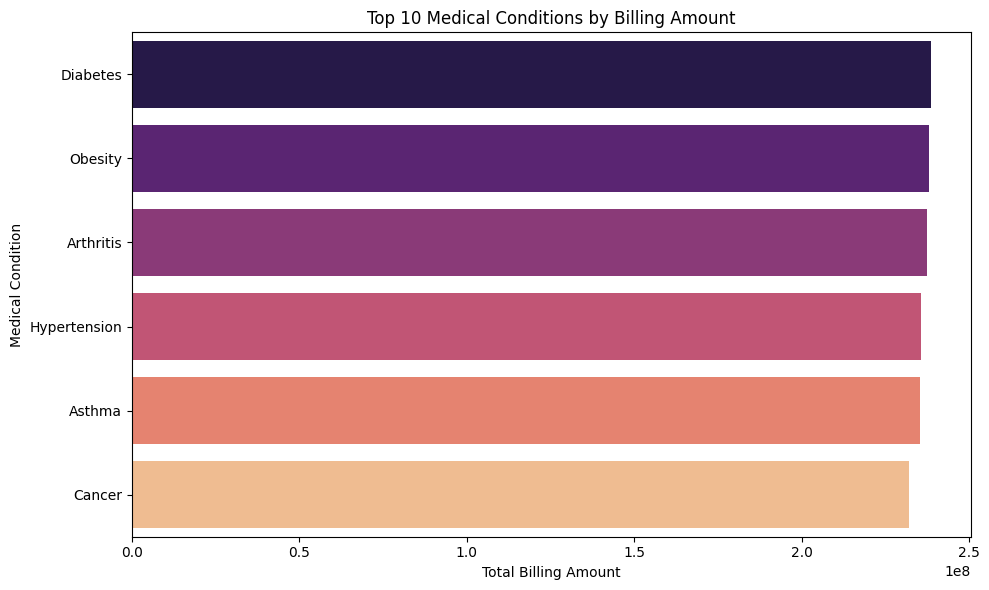

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=condition_billing.head(10).values, y=condition_billing.head(10).index, palette="magma")
plt.xlabel("Total Billing Amount")
plt.title("Top 10 Medical Conditions by Billing Amount")
plt.tight_layout()
plt.show()

In [97]:
# Which medication are the most expensive?
medication_cost = data.groupby("Medication")["Billing Amount"].agg(['mean', 'sum', 'count'])
medication_cost_sorted = medication_cost.sort_values(by='mean', ascending=False)
print("Top 10 most expensive medications:")
print(medication_cost_sorted.head(10))

Top 10 most expensive medications:
                     mean           sum  count
Medication                                    
Ibuprofen    25735.575732  2.863598e+08  11127
Aspirin      25594.255074  2.839427e+08  11094
Paracetamol  25533.470236  2.826810e+08  11071
Penicillin   25490.917427  2.821335e+08  11068
Lipitor      25342.468884  2.823151e+08  11140


C:\Users\user\AppData\Local\Temp\ipykernel_2956\3188216861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


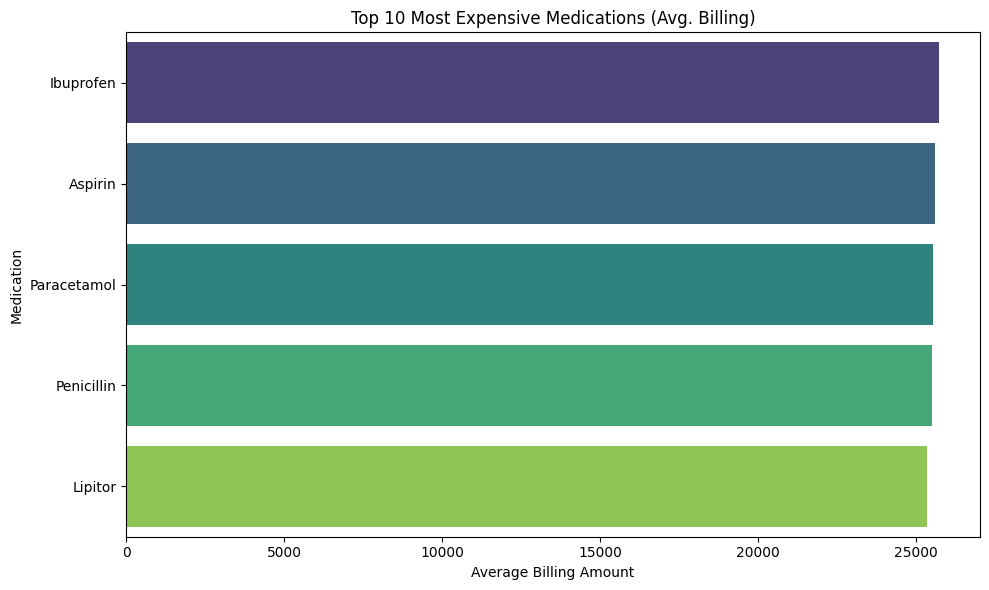

In [ ]:
# and plot it
plt.figure(figsize=(10, 6))
sns.barplot(
    x=medication_cost_sorted.head(10)['mean'],
    y=medication_cost_sorted.head(10).index,
    palette="viridis"
)
plt.xlabel("Average Billing Amount")
plt.title("Top 10 Most Expensive Medications (Avg. Billing)")
plt.tight_layout()
plt.show()

>> Ibuprofen is the most expensive medication.

In [ ]:
# Let's see how it affects the billing amount
ibuprofen_billing = data[data['Medication'] == 'Ibuprofen']['Billing Amount'].sum()
print(f"Total billing amount for Ibuprofen: {ibuprofen_billing:.2f}")


Total billing amount for Ibuprofen: 286359751.17


In [100]:
# Let's see most frequently prescribed medications.
medication_counts = data["Medication"].value_counts().head(10)
print("Top 10 most frequently prescribed medications:")
print(medication_counts)

Top 10 most frequently prescribed medications:
Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2956\2431117667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medication_counts.values, y=medication_counts.index, palette="crest")


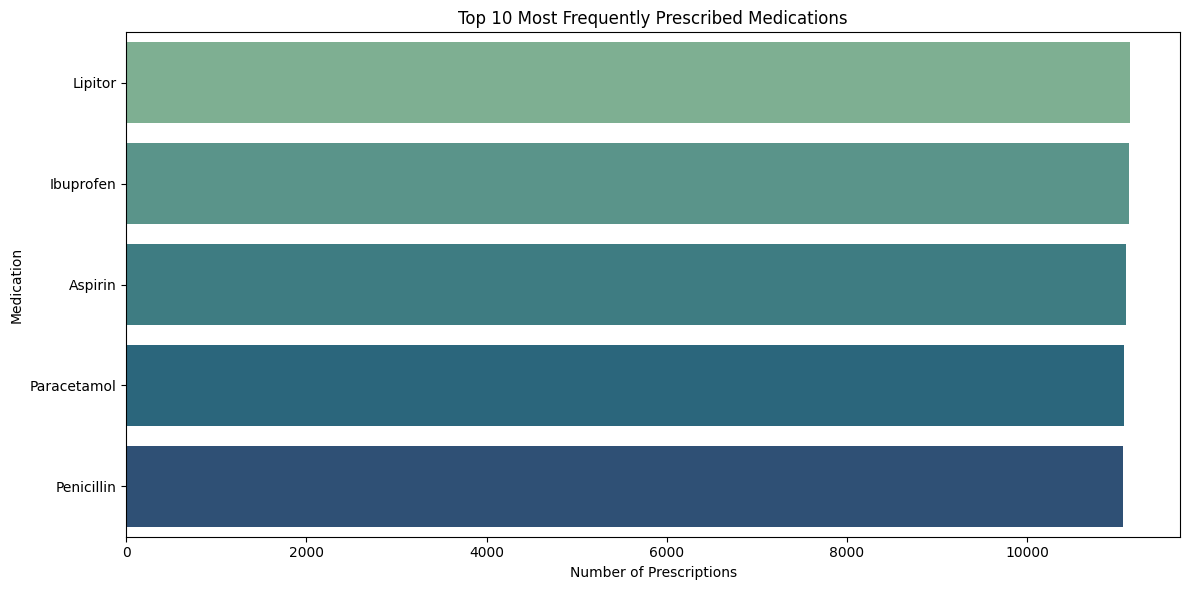

In [101]:
# and plot it
plt.figure(figsize=(12, 6))
sns.barplot(x=medication_counts.values, y=medication_counts.index, palette="crest")
plt.xlabel("Number of Prescriptions")
plt.ylabel("Medication")
plt.title("Top 10 Most Frequently Prescribed Medications")
plt.tight_layout()
plt.show()

>> Lipitor is the most frequently prescribed medication - "medication for high cholesterol"

In [ ]:
print("Unique values in Gender column:", data['Gender'].unique())

Unique values in Gender column: ['Male' 'Female']


In [107]:
# Let's divide the data into two groups: male and female and see if there are any differences between them.
male = data[data['Gender'] == 'Male']
female = data[data['Gender'] == 'Female']

In [108]:
numerical_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(include='object').columns.drop('Gender') # we need to separate columns by type

In [109]:
print("\n Numerical Summary (Mean):")
print("Male:\n", male[numerical_cols].mean())
print("\nFemale:\n", female[numerical_cols].mean())


 Numerical Summary (Mean):
Male:
 Age                  51.500252
Billing Amount    25607.860571
Room Number         300.405739
Length of Stay       15.542198
dtype: float64

Female:
 Age                  51.578735
Billing Amount    25470.652958
Room Number         301.865181
Length of Stay       15.475763
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2956\1932467379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Billing Amount', palette='pastel')


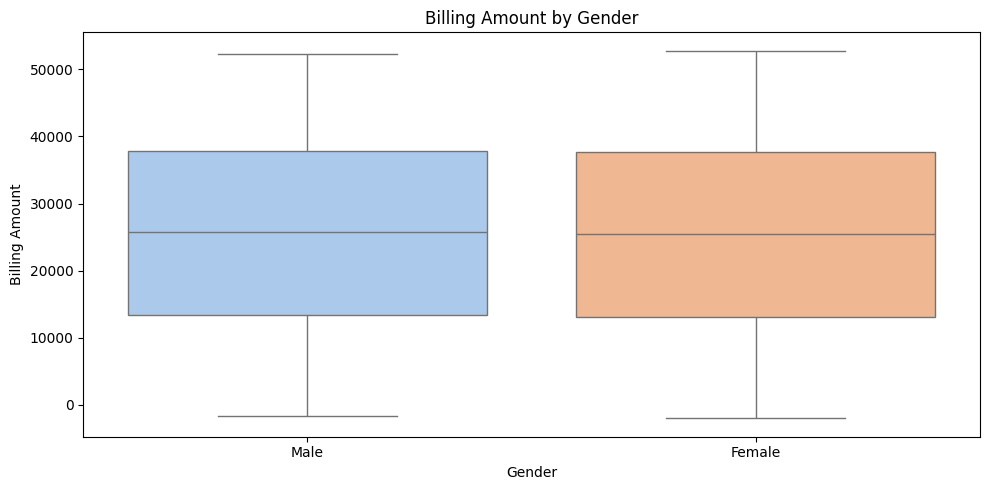

In [110]:
# Let's plot it
if 'Billing Amount' in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='Gender', y='Billing Amount', palette='pastel')
    plt.title("Billing Amount by Gender")
    plt.tight_layout()
    plt.show()



 Value counts for 'Blood Type':
Male:
 Blood Type
B+     0.128465
A-     0.126737
AB+    0.126341
AB-    0.125441
B-     0.125405
Name: proportion, dtype: float64
Female:
 Blood Type
A+     0.128544
O-     0.126668
O+     0.124937
AB-    0.124829
B-     0.124829
Name: proportion, dtype: float64


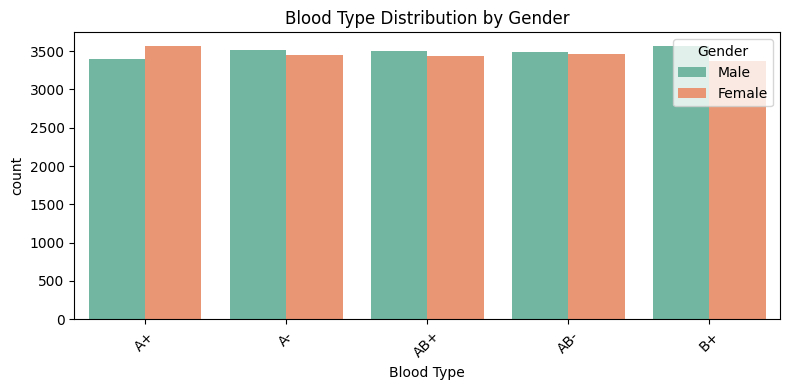


 Value counts for 'Medical Condition':
Male:
 Medical Condition
Diabetes        0.167531
Hypertension    0.166811
Asthma          0.166775
Cancer          0.166523
Arthritis       0.166415
Name: proportion, dtype: float64
Female:
 Medical Condition
Arthritis       0.169011
Diabetes        0.167749
Obesity         0.166703
Hypertension    0.166342
Cancer          0.165981
Name: proportion, dtype: float64


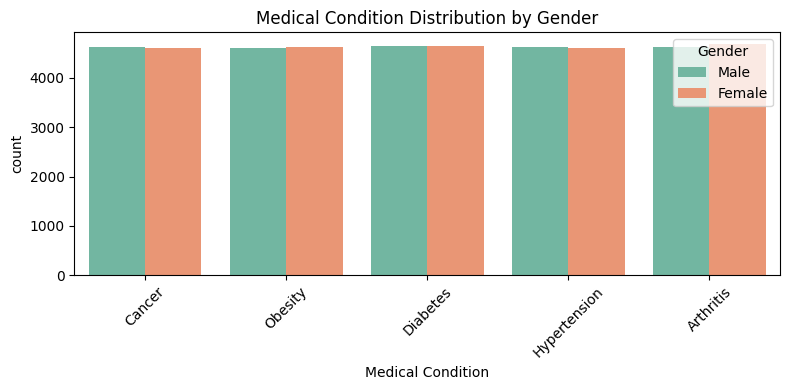


 Value counts for 'Doctor':
Male:
 Doctor
John Smith         0.000540
John Johnson       0.000468
Michael Johnson    0.000468
Michael Smith      0.000432
Elizabeth Smith    0.000432
Name: proportion, dtype: float64
Female:
 Doctor
Michael Smith      0.000541
James Smith        0.000433
Jessica Johnson    0.000397
William Johnson    0.000397
Robert Smith       0.000397
Name: proportion, dtype: float64


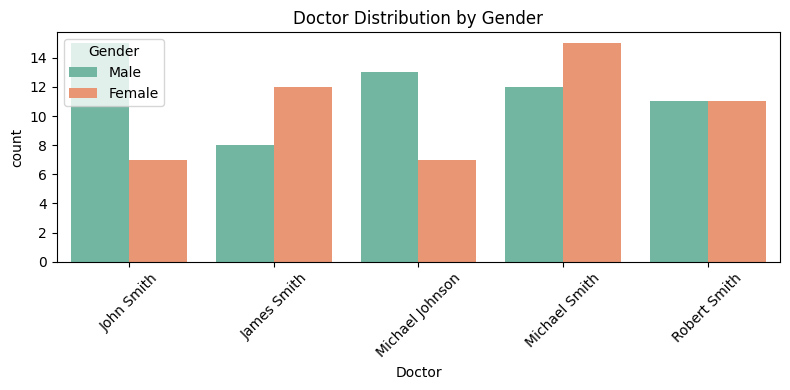


 Value counts for 'Hospital':
Male:
 Hospital
LLC Smith      0.000936
Johnson PLC    0.000756
Inc Johnson    0.000720
Group Smith    0.000648
Johnson Inc    0.000648
Name: proportion, dtype: float64
Female:
 Hospital
Ltd Smith       0.001154
Smith PLC       0.000830
Smith Inc       0.000793
PLC Williams    0.000757
Smith Ltd       0.000721
Name: proportion, dtype: float64


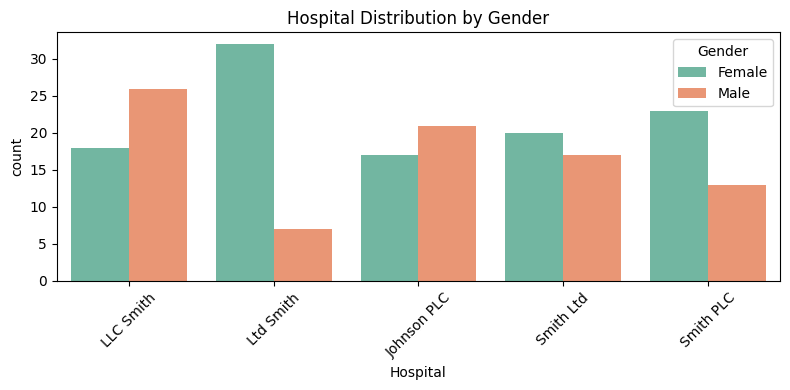


 Value counts for 'Insurance Provider':
Male:
 Insurance Provider
Cigna               0.201519
Medicare            0.200871
UnitedHealthcare    0.200655
Aetna               0.199143
Blue Cross          0.197811
Name: proportion, dtype: float64
Female:
 Insurance Provider
Cigna               0.203852
Medicare            0.201075
Blue Cross          0.200714
UnitedHealthcare    0.200245
Aetna               0.194114
Name: proportion, dtype: float64


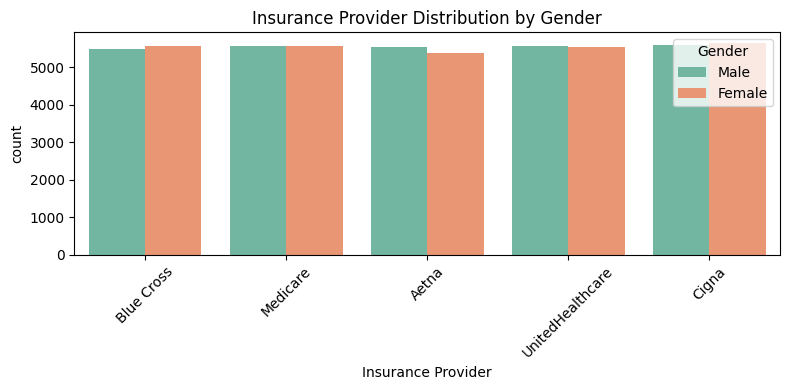


 Value counts for 'Admission Type':
Male:
 Admission Type
Urgent       0.340894
Elective     0.334161
Emergency    0.324944
Name: proportion, dtype: float64
Female:
 Admission Type
Elective     0.338094
Emergency    0.333405
Urgent       0.328500
Name: proportion, dtype: float64


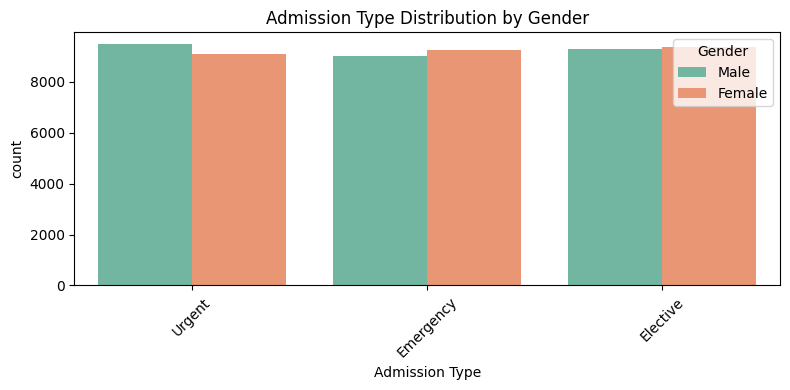


 Value counts for 'Medication':
Male:
 Medication
Paracetamol    0.203032
Lipitor        0.201231
Penicillin     0.199467
Ibuprofen      0.199251
Aspirin        0.197019
Name: proportion, dtype: float64
Female:
 Medication
Aspirin        0.202770
Ibuprofen      0.201724
Lipitor        0.200209
Penicillin     0.199380
Paracetamol    0.195917
Name: proportion, dtype: float64


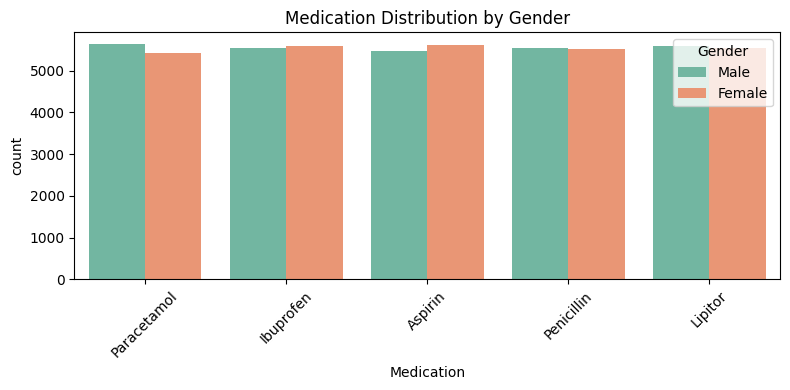


 Value counts for 'Test Results':
Male:
 Test Results
Normal          0.336466
Abnormal        0.334449
Inconclusive    0.329085
Name: proportion, dtype: float64
Female:
 Test Results
Abnormal        0.336796
Inconclusive    0.332396
Normal          0.330809
Name: proportion, dtype: float64


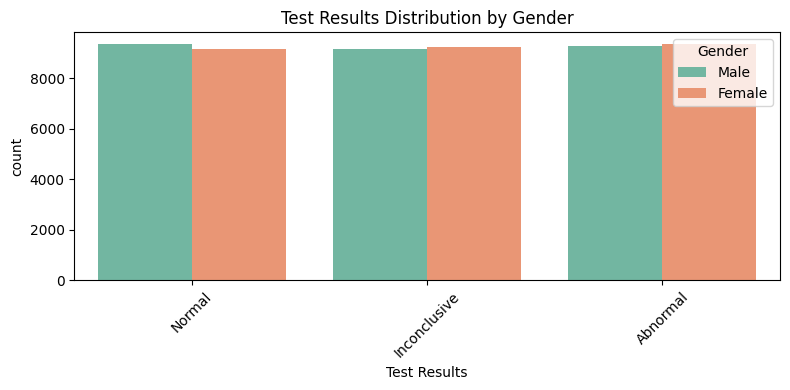

In [ ]:
# Let's compare categorical columns and plot it
for col in categorical_cols:
    print(f"\n Value counts for '{col}':")
    print("Male:\n", male[col].value_counts(normalize=True).head())
    print("Female:\n", female[col].value_counts(normalize=True).head())
    
    # Plot top categories
    top_values = data[col].value_counts().nlargest(5).index
    data_filtered = data[data[col].isin(top_values)]

    plt.figure(figsize=(8, 4))
    sns.countplot(data=data_filtered, x=col, hue='Gender', palette='Set2')
    plt.title(f"{col} Distribution by Gender")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

> What's different between male and female patients?

* The most frequent medical conditions for males are diabetes and hypertension, for females: arthiritis and diabetes.
* Doctor and hospital distribution vary the most between male and female probably because there are many unique values in those 2 columns.
* Cigna is the main Insurance Provider for both males and females.
* There are more males wit urgent admission type.
* The most frequent medication prescribed are Paracetamol and Lipitor for males and Aspirin and Ibuprofen for females.

In [123]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Predictive Modeling:
* Regression - predicting Billing Amount
* Classification - predicting Admission Type

In [127]:
# label encoding categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    

In [131]:
# Classification
X_clf = data.drop(columns=['Name', 'Admission Type', 'Date of Admission', 'Discharge Date', 'Billing Amount'])
y_clf = data['Admission Type']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


KeyError: "['Name', 'Date of Admission', 'Discharge Date'] not found in axis"

In [129]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

y_pred_clf = rf_clf.predict(X_test_clf)

ValueError: could not convert string to float: 'Female'